# Lab #6

In [23]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from scipy import stats
import h5py
import pandas as pd
import imageio
import pickle as pkl

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,6)


In [24]:
qcd_before = pkl.load( open( "gcd.pkl", "rb" ) )
higgs_before = pkl.load( open( "higgs.pkl", "rb"))
qcd = pd.DataFrame(qcd_before, columns=['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])
higgs = pd.DataFrame(higgs_before, columns=['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])

## Problem 1)

In [25]:
x = np.linspace(0,1000, len(qcd['mass']))
bkgd = stats.poisson.rvs(loc=0, mu=100, size = len(qcd['mass']))
prob5sigma = 1/3.5e6
detplus = stats.poisson.ppf(1 - prob5sigma, mu=100, loc=0)
detminus = stats.poisson.ppf(prob5sigma, mu=100, loc=0)
print(f'5 sigma signal strength for single pixel: {detminus} and {detplus}')

5 sigma signal strength for single pixel: 54.0 and 154.0


5$\sigma$  value is at 154. To show asymmetry, I calculated the other 5 sigma value to be at 54. The average value of the two 5 sigma points is offest from the center by 4. 

## Problem 2)

In [26]:
signal = stats.uniform.rvs(loc=999,scale=1, size = len(qcd['mass']))
data = bkgd + signal

signaledges = np.linspace(0,1000,200)
dataedges = np.linspace(0,1000,200)

#Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

#datacenters = (dataedges[:-1] + dataedges[1:]) / 2
#signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
#plt.pcolormesh(datacenters,signalcenters,Psd.T)
#plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
#plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Text(0.5, 1.0, 'True Signal = 1000')

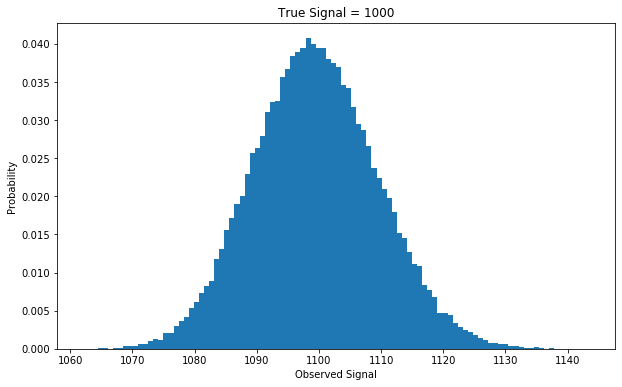

In [27]:
plt.hist(data, bins = 100, density=True)
plt.xlabel('Observed Signal')
plt.ylabel('Probability')
plt.title('True Signal = 1000')

This histogram describes the spread of possible observed signal values from a true signal of 1000. If a true signal of 1000 was collected, these are the values and associated probabilities of what the background noise will cause the measurement tool to observe. 

The distribution of the observed signal is almost symmtric around a single point, ~1100 but because it is Poissonian there is a slightly larger tail to the right which is the source of some asymmetry. The observed signal is biased. The observed signal is always greater than the true signal because the background is always a positive value. 

## Problem 3)

Text(0.5, 0, 'Observed data, $P(d|s)$')

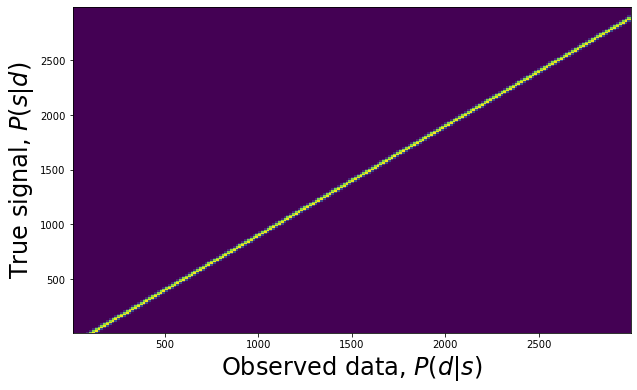

In [28]:
bkgd = stats.poisson.rvs(loc=0, mu=100, size = 200*len(qcd['mass']))
signal = stats.uniform.rvs(loc=0,scale=10000, size = 200*len(qcd['mass']))
data = bkgd + signal

signaledges = np.linspace(0,3000,200)
dataedges = np.linspace(0,3000,200)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

I have injected true signal values from 0 to 10000, which will allow me to see dicrepencies between the observed data and the actual signal. The 2D histogram represents and displays the correlation between true signals and their corresponding observed signals. This shows that for every true signal value, the corresponding observed signal is essentially 100 greater. 

In [29]:
table = pd.DataFrame(columns = ['Background', 'Signal', 'Data'])
table['Data'] = data
table['Signal'] = signal
table['Background'] = bkgd
table 

,Background,Signal,Data
0,97,8080.462595,8177.462595
1,96,5523.843889,5619.843889
2,96,872.785914,968.785914
3,112,6028.769312,6140.769312
4,102,4475.012191,4577.012191
...,...,...,...
19999995,102,1398.003784,1500.003784
19999996,105,4683.013141,4788.013141
19999997,88,283.194997,371.194997
19999998,103,8703.664172,8806.664172


The above table is a collection of the background signal, injected signal strength, and observed signal strength all in one database. It will be what I will use to represent the data and make cuts in order to select specific values of observed/true signal strength and display the distribution of signal strengths for each counterpart. 

Text(0.5, 1.0, 'True Signal of 1000, Observed Signal Spread')

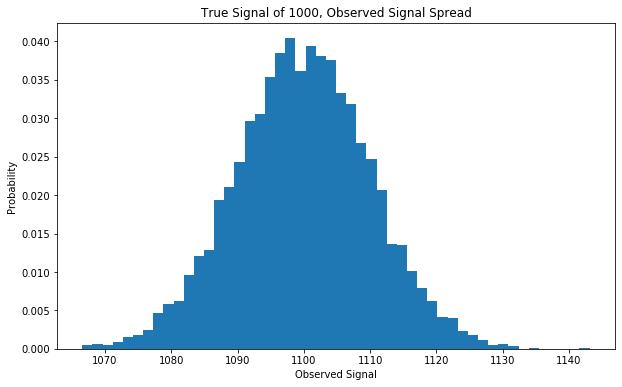

In [30]:
signal1000 = table.query(f'999 < Signal < 1001')
plt.hist(signal1000['Data'], bins =50, density = True)
plt.xlabel('Observed Signal')
plt.ylabel('Probability')
plt.title('True Signal of 1000, Observed Signal Spread')

This is the spread of possible observed signal values for a true signal value of 1000. It matches the one created above. It is nearly symmetric, and biased by relatively 100.

Text(0.5, 1.0, 'Observed Signal of 1000, True Signal Possibility Spread')

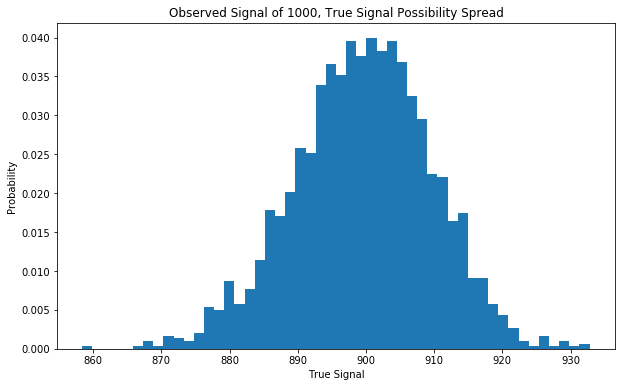

In [31]:
observed1000 = table.query(f'999 < Data < 1000')
plt.hist(observed1000['Signal'], bins =50, density = True)
plt.xlabel('True Signal')
plt.ylabel('Probability')
plt.title('Observed Signal of 1000, True Signal Possibility Spread')

The above plot shows the True signal values and associated probabilities for an observation that yields 1000. The values are surrounding what corresponds to a distribution of signals around 100 (average background) subtracted from the observed signal strength. This makes sense as you would want to subtract the background from the observed signal to realize the true signal. 

By integrating the histogram of True signal values to find the bounds that provide 34% of the data to the right and left of the mean, we can find the 1$\sigma$ values, and hence the uncertainty of the distribution. The process I employ is one that adds the bars of the above histogram from right to left until 68% of the distribution is left in the middle. 

In [32]:
hist, edges = np.histogram(observed1000['Signal'], bins = 8000, density=True)
x=0
for i in range(0, len(edges)):
    if x < .16:
        p1 = x
    else:
        print(f' {x}% and {edges[i]}')
        x1 = edges[i]
        break
    x = x + hist[i]
x=0   
for i in range(0, len(edges)):
    if x < .16:
        p2 = x
    else:
        print(f' {x}% and {edges[-i]}')
        x2 = edges[-i]
        break   
    x = x + hist[-i]
print(f'1 sigma signal strength at: {x1} and {x2} which appear at distances from the mean: {x1-900:.2f} and {x2-900:.2f}')

 0.16103836274374655% and 867.7392726783748
 0.16103836274374655% and 932.0580117335866
1 sigma signal strength at: 867.7392726783748 and 932.0580117335866 which appear at distances from the mean: -32.26 and 32.06


The asymmetry can start to be seen even at the 1$\sigma$ values. The 1$\sigma$ uncertainty is $^{+32.1}_{-32.3}$ 

This means that the observed signal is equal to {True Signal Value}$+ 100 ^{+32.1}_{-32.3}$

*** These upper and lower uncertainties are subject to change due to the rvs creation providing different values every time it is created ***

The observed signal is biased, and close to symmetric at least up to 1 sigma. 

This all makes sense because the background is always positive and the uncertainty of the background is slightly asymmetric so the distribution of possible true signals will also be slightly asymmetric. 

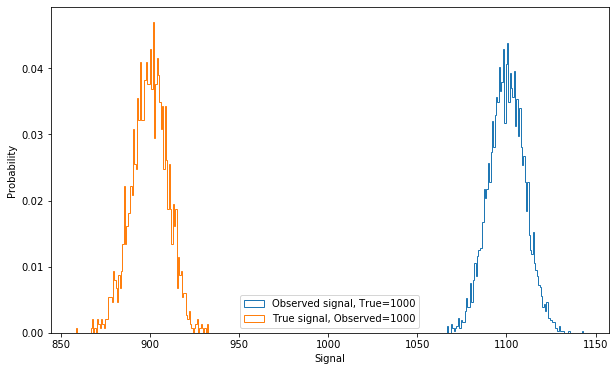

In [33]:
plt.hist(signal1000['Data'], bins =100, density = True, histtype='step', label="Observed signal, True=1000")
plt.hist(observed1000['Signal'], bins =100, density = True, histtype='step', label="True signal, Observed=1000")
plt.xlabel('Signal')
plt.ylabel('Probability')
plt.legend()
#plt.title('Observed Signal of 1000, True Signal Possibility Spread')

The two histograms show the distributions of true signal given an exact observed distribution, and the observed signal distribution given a true signal value. Given values were 1000 in both cases